<a href="https://colab.research.google.com/github/mdanyassri/C117/blob/main/C117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving heart.csv to heart.csv


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

df = pd.read_csv("heart.csv")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]


In [ ]:
from sklearn.model_selection import train_test_split

factors = df[["age", "sex", "cp",  "chol", "thalach"]]
heart_attack = df["target"]
factors_train, factors_test, heart_attack_train, heart_attack_test = train_test_split(factors, heart_attack, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
factors_train = sc_x.fit_transform(factors_train)
factors_test = sc_x.fit_transform(factors_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(factors_train, heart_attack_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
heart_attack_prediction = classifier.predict(factors_test)
predicted_values = []
for i in heart_attack_prediction:
  if i ==0:
    predicted_values.append("No")
  else:
    predicted_values.append("Yes")

actual_values = []
for i in heart_attack_test.ravel():
  if i ==0:
    actual_values.append("No")
  else:
    actual_values.append("Yes")

[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

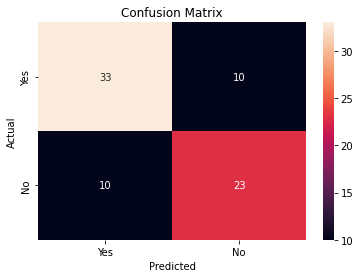

In [ ]:
labels = ["Yes", "No"]
cm = confusion_matrix(actual_values, predicted_values, labels)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

accuracy = tp + tn / tp + tn + fp + fn ---> accuracy formula

In [ ]:
accuracy = (33 + 23) / (33 + 10 + 10 + 23)
print(accuracy)

0.7368421052631579
